In [1]:
import pandas as pd
df=pd.read_csv('./grouped_data5-1.csv')
df

,credit_score,credit__section,country,age,age_group,gender,age_group_gender,tenure,balance,balance_group,balance_per_age,balance_per_tenure,products_number,credit_card,salary_per_products,active_member,estimated_salary,salary_range,churn
0,619,Poor,France,42,forties,Female,forties_Female,3,119839.69,zero,2853.325952,39946.563333,1,1,101348.880,1,101348.88,very high,1
1,608,Poor,Spain,41,forties,Female,forties_Female,2,83807.86,rest,2044.094146,41903.930000,1,0,112542.580,1,112542.58,very high,0
2,502,Very poor,France,42,forties,Female,forties_Female,9,159660.80,rest,3801.447619,17740.088889,3,1,37977.190,0,113931.57,very high,1
3,699,Fair,France,39,thirties,Female,thirties_Female,2,119839.69,zero,3072.812564,59919.845000,2,0,46913.315,0,93826.63,high,0
4,850,Excellent,Spain,43,forties,Female,forties_Female,3,125510.82,rest,2918.856279,41836.940000,1,1,79084.100,1,79084.10,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Good,France,39,thirties,Male,thirties_Male,6,119839.69,zero,3072.812564,19973.281667,2,1,48135.320,0,96270.64,high,0
9996,516,Very poor,France,35,thirties,Male,thirties_Male,11,57369.61,rest,1639.131714,5215.419091,1,1,101699.770,1,101699.77,very high,0
9997,709,Fair,France,36,thirties,Female,thirties_Female,8,119839.69,zero,3328.880278,14979.961250,1,0,42085.580,1,42085.58,medium,1
9998,772,Good,Germany,42,forties,Male,forties_Male,4,75075.31,rest,1787.507381,18768.827500,2,1,46444.260,0,92888.52,high,1


In [2]:
df.dtypes

credit_score             int64
credit__section         object
country                 object
age                      int64
age_group               object
gender                  object
age_group_gender        object
tenure                   int64
balance                float64
balance_group           object
balance_per_age        float64
balance_per_tenure     float64
products_number          int64
credit_card              int64
salary_per_products    float64
active_member            int64
estimated_salary       float64
salary_range            object
churn                    int64
dtype: object

# 신용 점수와 추정 월급과의 상관계수

In [3]:
import pandas as pd
import numpy as np

# 피어슨 상관계수 계산
correlation = df['estimated_salary'].corr(df['credit_score'])
print(f"피어슨 상관계수: {correlation}")

# 이 참에 전체 상관계수를 한번 더 확인한다

피어슨 상관계수: -0.0013842928679845211


In [4]:
# 일단 데이터 타입을 확인해서 수치형 변수만 골라낸다
df['active_member']=df['active_member'].astype('object')
df['credit_card']=df['credit_card'].astype('object')

df.dtypes

credit_score             int64
credit__section         object
country                 object
age                      int64
age_group               object
gender                  object
age_group_gender        object
tenure                   int64
balance                float64
balance_group           object
balance_per_age        float64
balance_per_tenure     float64
products_number          int64
credit_card             object
salary_per_products    float64
active_member           object
estimated_salary       float64
salary_range            object
churn                    int64
dtype: object

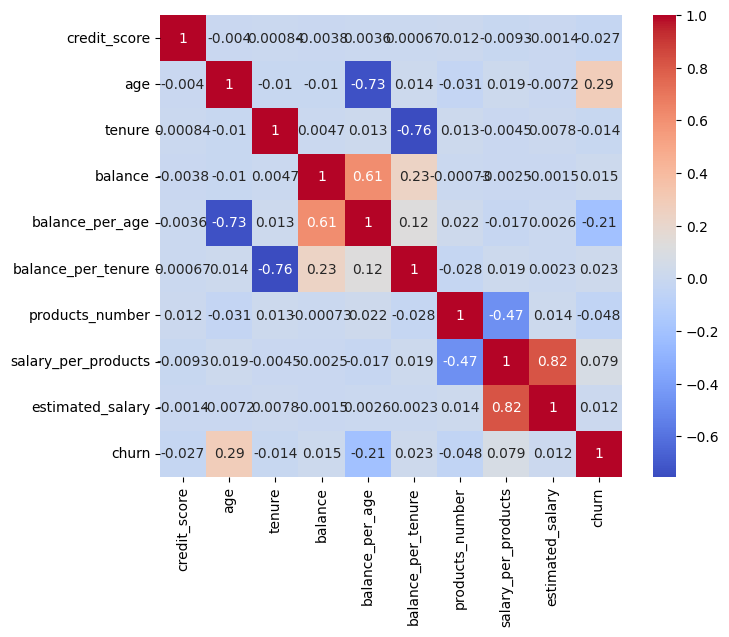

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_num=df.select_dtypes(include=[int,float])

# 상관계수 계산
correlation_matrix = df_num.corr()

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
# plt.title('Correlation Heatmap')
plt.show()

# 보통 신용 점수와 추정 월급은 연관이 깊지 않나
# 아무튼 재확인해보니 이 데이터셋에서 상관계수는 낮다

# 종속 변수와의 상관계수-정보 이득이 낮은 파생 변수를 버려야 할지 결정한다

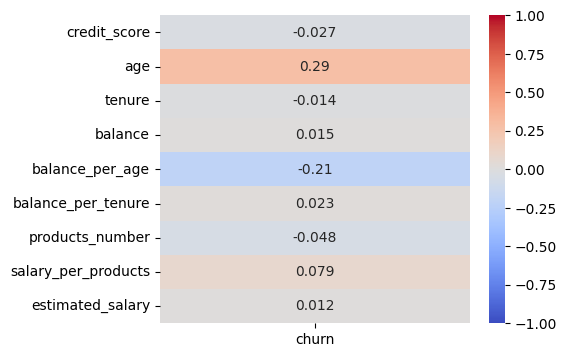

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 수치형 열 선택
df_num = df.select_dtypes(include=[int, float])

# 상관계수 행렬 계산
corr_matrix = df_num.corr(method='pearson')

# 종속 변수와 독립 변수 간의 상관계수만 추출
target_corr = corr_matrix[['churn']].drop('churn')

# 히트맵 시각화
plt.figure(figsize=(5,4))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# annot 셀의 값 표기
# plt.title('종속 변수와 독립 변수 간의 상관계수')
plt.show()

# 정보 이득이 낮은 파생 변수가 대부분 구간을 나눈 것
# 즉 범주형 변수를 다뤄야 하니 이것은 적합하지 않다

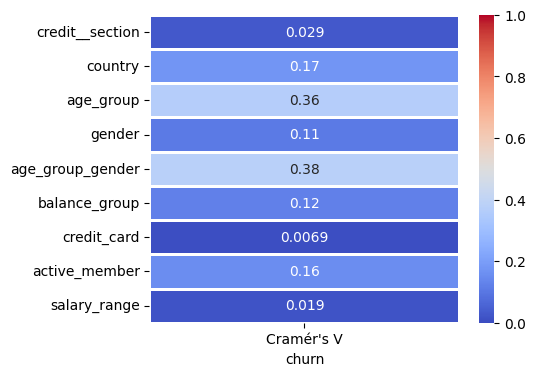

In [7]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# 크레이머 V 계산 함수
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# 종속 변수와 독립 변수 간의 크레이머 V 계산 함수
def cramers_v_for_target(df, target):
    independent_vars = [col for col in df.columns if col != target]
    cramers_v_values = []

    for col in independent_vars:
        cramers_v_values.append(cramers_v(df[target], df[col]))
    
    return pd.DataFrame({'Independent Variable': independent_vars, 'Cramér\'s V': cramers_v_values})

df['churn']=df['churn'].astype('object')

df_cat = df.select_dtypes(include=[object])

# 종속 변수 'churn'과 독립 변수들 간의 크레이머 V 계산
cramers_v_df = cramers_v_for_target(df_cat, 'churn')

# 시각화
plt.figure(figsize=(5, 4))

# 'churn'과 독립 변수들의 크레이머 V 계수 시각화
sns.heatmap(cramers_v_df.set_index('Independent Variable'), 
            annot=True, cmap='coolwarm', cbar=True, linewidths=1, vmax=1, vmin=0)

# plt.xlabel('Independent Variables')
plt.xlabel('churn')
plt.ylabel('')  # y축 라벨 숨김
# plt.title('Cramér\'s V for \'churn\' and Independent Variables')
plt.show()


In [8]:
help(cramers_v_for_target)

Help on function cramers_v_for_target in module __main__:

cramers_v_for_target(df, target)
    # 종속 변수와 독립 변수 간의 크레이머 V 계산 함수



# 정보 이득과 상관 계수, 크레이머 v 계수를 바탕으로 중요 변수 추출

In [9]:
df.columns

Index(['credit_score', 'credit__section', 'country', 'age', 'age_group',
       'gender', 'age_group_gender', 'tenure', 'balance', 'balance_group',
       'balance_per_age', 'balance_per_tenure', 'products_number',
       'credit_card', 'salary_per_products', 'active_member',
       'estimated_salary', 'salary_range', 'churn'],
      dtype='object')

In [10]:
df_after=df.drop(['credit__section','age', 'age_group','gender','tenure','balance','balance_group','products_number','credit_card','salary_range','estimated_salary'],axis=1)
df_after

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn
0,619,France,forties_Female,2853.325952,39946.563333,101348.880,1,1
1,608,Spain,forties_Female,2044.094146,41903.930000,112542.580,1,0
2,502,France,forties_Female,3801.447619,17740.088889,37977.190,0,1
3,699,France,thirties_Female,3072.812564,59919.845000,46913.315,0,0
4,850,Spain,forties_Female,2918.856279,41836.940000,79084.100,1,0
...,...,...,...,...,...,...,...,...
9995,771,France,thirties_Male,3072.812564,19973.281667,48135.320,0,0
9996,516,France,thirties_Male,1639.131714,5215.419091,101699.770,1,0
9997,709,France,thirties_Female,3328.880278,14979.961250,42085.580,1,1
9998,772,Germany,forties_Male,1787.507381,18768.827500,46444.260,0,1


In [11]:
csv_filename = '중요변수추출.csv'
df_after.to_csv(csv_filename, index=False)

In [12]:
df_after.dtypes

credit_score             int64
country                 object
age_group_gender        object
balance_per_age        float64
balance_per_tenure     float64
salary_per_products    float64
active_member           object
churn                   object
dtype: object

# OneHotEncoder()

In [13]:
# 이미 데이터가 0과 1로 이루어진 활동성, 이탈 여부는 원핫인코딩에서 제외한다
# 이와 더불어 데이터 타입이 수치형인 것들도 마찬가지

# 국가, 나이대와 성별만 수행한다

In [38]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False
    # drop=None,
    # 어떤 범주를 제외할지 설정

    # 모든 범주에 대해 인코딩을 수행
    # 즉 각 범주가 하나의 열로 인코딩 된다
    # sparse_output=False
    # 인코딩 결과를 희소 행렬 sparse matrix 로 반활할지
    # 밀집 행렬 dense matri 로 반환할지 결정

    # 밀집 행렬로 결과를 반환
    # 모든 값이 0 또는 1로 명시된 넘파이 배열로 반환
    # 이 경우 바로 데이터프레임으로 변환하여 사용 가능함
    )

In [39]:
ohe.fit(df_after[['country']])
ohe.transform(df_after[['country']])

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [40]:
ohe.transform(df_after[['country']]).shape

(10000, 3)

In [41]:
ohe.transform(df_after[['country']])

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [42]:
ohe.get_feature_names_out(['country']).tolist()

['country_France', 'country_Germany', 'country_Spain']

In [43]:
import sklearn
import pandas as pd

print(sklearn.__version__)
print(pd.__version__)

1.0.2
1.3.5


In [44]:
ohe_country = pd.DataFrame(ohe.transform(df_after[['country']]),
                           columns=ohe.get_feature_names_out(['country']).tolist())
ohe_country

,country_France,country_Germany,country_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [45]:
ohe.fit(df_after[['age_group_gender']])
ohe.transform(df_after[['age_group_gender']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [46]:
ohe_agg = pd.DataFrame(ohe.transform(df_after[['age_group_gender']]),
                       columns=ohe.get_feature_names_out(['age_group_gender']))
ohe_agg

,age_group_gender_eighties_Female,age_group_gender_eighties_Male,age_group_gender_fifties_Female,age_group_gender_fifties_Male,age_group_gender_forties_Female,age_group_gender_forties_Male,age_group_gender_nineties_Male,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
df_encoded = pd.concat([df_after,ohe_country,ohe_agg],axis=1)
df_encoded

,credit_score,country,age_group_gender,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,619,France,forties_Female,2853.325952,39946.563333,101348.880,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,608,Spain,forties_Female,2044.094146,41903.930000,112542.580,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,502,France,forties_Female,3801.447619,17740.088889,37977.190,0,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,699,France,thirties_Female,3072.812564,59919.845000,46913.315,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,850,Spain,forties_Female,2918.856279,41836.940000,79084.100,1,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,thirties_Male,3072.812564,19973.281667,48135.320,0,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,516,France,thirties_Male,1639.131714,5215.419091,101699.770,1,0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,709,France,thirties_Female,3328.880278,14979.961250,42085.580,1,1,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,772,Germany,forties_Male,1787.507381,18768.827500,46444.260,0,1,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
df_encoded = df_encoded.drop(['country','age_group_gender'],axis=1)
df_encoded

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,619,2853.325952,39946.563333,101348.880,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,608,2044.094146,41903.930000,112542.580,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,502,3801.447619,17740.088889,37977.190,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,699,3072.812564,59919.845000,46913.315,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,850,2918.856279,41836.940000,79084.100,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,3072.812564,19973.281667,48135.320,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,516,1639.131714,5215.419091,101699.770,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,709,3328.880278,14979.961250,42085.580,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,772,1787.507381,18768.827500,46444.260,0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
csv_filename = '원핫인코딩.csv'
df_encoded.to_csv(csv_filename, index=False)

# 표준화

In [50]:
df_encoded

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,619,2853.325952,39946.563333,101348.880,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,608,2044.094146,41903.930000,112542.580,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,502,3801.447619,17740.088889,37977.190,0,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,699,3072.812564,59919.845000,46913.315,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,850,2918.856279,41836.940000,79084.100,1,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,3072.812564,19973.281667,48135.320,0,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,516,1639.131714,5215.419091,101699.770,1,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,709,3328.880278,14979.961250,42085.580,1,1,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,772,1787.507381,18768.827500,46444.260,0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
df_encoded = df_encoded.astype({'credit_score':'float',
                                'active_member':'float',
                                'churn':'float'})
df_encoded

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,619.0,2853.325952,39946.563333,101348.880,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,608.0,2044.094146,41903.930000,112542.580,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,502.0,3801.447619,17740.088889,37977.190,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,699.0,3072.812564,59919.845000,46913.315,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,850.0,2918.856279,41836.940000,79084.100,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,3072.812564,19973.281667,48135.320,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,516.0,1639.131714,5215.419091,101699.770,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,709.0,3328.880278,14979.961250,42085.580,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,772.0,1787.507381,18768.827500,46444.260,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
df_encoded.dtypes

credit_score                         float64
balance_per_age                      float64
balance_per_tenure                   float64
salary_per_products                  float64
active_member                        float64
churn                                float64
country_France                       float64
country_Germany                      float64
country_Spain                        float64
age_group_gender_eighties_Female     float64
age_group_gender_eighties_Male       float64
age_group_gender_fifties_Female      float64
age_group_gender_fifties_Male        float64
age_group_gender_forties_Female      float64
age_group_gender_forties_Male        float64
age_group_gender_nineties_Male       float64
age_group_gender_seventies_Female    float64
age_group_gender_seventies_Male      float64
age_group_gender_sixties_Female      float64
age_group_gender_sixties_Male        float64
age_group_gender_teenager_Female     float64
age_group_gender_teenager_Male       float64
age_group_

In [53]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np

# 종속 변수만 제외하고 칼럼 고르기
cols_for_standard = df_encoded.columns.difference(['churn'])

# 표준화
scaler = StandardScaler()

# 원핫인코딩이 완료된 데이터프레임 카피하기
df_standardized = df_encoded.copy()

# 카피한 데이터프레임에 표준화된 칼럼 붙여넣기
df_standardized[cols_for_standard] = scaler.fit_transform(df_encoded[cols_for_standard])

In [54]:
scaler.mean_
# 원본 데이터에서 각 변수의 평균값

array([5.15100000e-01, 6.00000000e-04, 7.00000000e-04, 4.21000000e-02,
       4.48000000e-02, 1.24700000e-01, 1.37100000e-01, 2.00000000e-04,
       7.00000000e-03, 6.60000000e-03, 1.65000000e-02, 2.10000000e-02,
       1.30000000e-03, 3.60000000e-03, 1.88400000e-01, 2.46200000e-01,
       7.37000000e-02, 8.55000000e-02, 3.29346201e+03, 2.89911118e+04,
       5.01400000e-01, 2.50900000e-01, 2.47700000e-01, 6.50528800e+02,
       7.47151580e+04])

In [55]:
scaler.scale_
# 원본 데이터에서 각 변수의 표준편차

array([4.99771938e-01, 2.44875479e-02, 2.64482514e-02, 2.00817305e-01,
       2.06864593e-01, 3.30378435e-01, 3.43952889e-01, 1.41407213e-02,
       8.33726574e-02, 8.09718470e-02, 1.27388186e-01, 1.43384100e-01,
       3.60320690e-02, 5.98919026e-02, 3.91031252e-01, 4.30796425e-01,
       2.61282051e-01, 2.79624302e-01, 1.09422096e+03, 2.49516494e+04,
       4.99998040e-01, 4.33531072e-01, 4.31676627e-01, 9.66484660e+01,
       5.20562964e+04])

In [56]:
df_standardized

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,-0.326221,-0.402237,0.439067,0.511633,0.970243,1.0,0.997204,-0.578736,-0.573809,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767
1,-0.440036,-1.141788,0.517514,0.726664,0.970243,0.0,-1.002804,-0.578736,1.742740,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767
2,-1.536794,0.464244,-0.450913,-0.705735,-1.030670,1.0,0.997204,-0.578736,-0.573809,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767
3,0.501521,-0.201650,1.239547,-0.534073,-1.030670,0.0,0.997204,-0.578736,-0.573809,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,2.075537,-0.571500,-0.282071,-0.305767
4,2.063884,-0.342349,0.514829,0.083927,0.970243,0.0,-1.002804,-0.578736,1.742740,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.201650,-0.361412,-0.510598,-1.030670,0.0,0.997204,-0.578736,-0.573809,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,1.749782,-0.282071,-0.305767
9996,-1.391939,-1.511880,-0.952871,0.518374,0.970243,0.0,0.997204,-0.578736,-0.573809,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,1.749782,-0.282071,-0.305767
9997,0.604988,0.032368,-0.561532,-0.626813,0.970243,1.0,0.997204,-0.578736,-0.573809,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,2.075537,-0.571500,-0.282071,-0.305767
9998,1.256835,-1.376280,-0.409684,-0.543083,-1.030670,1.0,-1.002804,1.727904,-0.573809,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767


In [57]:
df_standardized.head()

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,-0.326221,-0.402237,0.439067,0.511633,0.970243,1.0,0.997204,-0.578736,-0.573809,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.5715,-0.282071,-0.305767
1,-0.440036,-1.141788,0.517514,0.726664,0.970243,0.0,-1.002804,-0.578736,1.742740,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.5715,-0.282071,-0.305767
2,-1.536794,0.464244,-0.450913,-0.705735,-1.030670,1.0,0.997204,-0.578736,-0.573809,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.5715,-0.282071,-0.305767
3,0.501521,-0.201650,1.239547,-0.534073,-1.030670,0.0,0.997204,-0.578736,-0.573809,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,2.075537,-0.5715,-0.282071,-0.305767
4,2.063884,-0.342349,0.514829,0.083927,0.970243,0.0,-1.002804,-0.578736,1.742740,-0.024502,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.5715,-0.282071,-0.305767


In [58]:
csv_filename = '표준화.csv'
df_standardized.to_csv(csv_filename, index=False)

In [59]:
for col in df_standardized.columns:
    mean_value = df_standardized[col].mean()
    std_value = df_standardized[col].std()
    # if mean_value < 0:
    #     mean_value_rever = -mean_value
    print('%.5f %10.5f' %(mean_value, std_value))
    # 소수점 오차나 계산 방법에 따라 표준편차가 정확히 1이 아닌 경우가 있다

-0.00000    1.00005
-0.00000    1.00005
0.00000    1.00005
0.00000    1.00005
-0.00000    1.00005
0.20370    0.40277
0.00000    1.00005
-0.00000    1.00005
-0.00000    1.00005
-0.00000    1.00005
-0.00000    1.00005
0.00000    1.00005
0.00000    1.00005
-0.00000    1.00005
0.00000    1.00005
0.00000    1.00005
-0.00000    1.00005
-0.00000    1.00005
-0.00000    1.00005
-0.00000    1.00005
0.00000    1.00005
-0.00000    1.00005
-0.00000    1.00005
-0.00000    1.00005
-0.00000    1.00005
-0.00000    1.00005


# 정규화

In [60]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# 종속 변수만 제외하고 정규화
cols_for_minmax = df_encoded.columns.difference(['churn'])

# 정규화
scaler = MinMaxScaler()
df_normalized = df_encoded.copy()
df_normalized[cols_for_minmax] = scaler.fit_transform(df_encoded[cols_for_minmax])

In [61]:
df_normalized

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,0.538,0.272722,0.196267,0.506790,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.516,0.192734,0.206282,0.562770,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.304,0.366438,0.082654,0.189867,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.698,0.294417,0.298455,0.234557,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.000,0.279199,0.205939,0.395443,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.294417,0.094080,0.240668,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9996,0.332,0.152706,0.018575,0.508545,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9997,0.718,0.319728,0.068533,0.210413,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9998,0.844,0.167372,0.087917,0.232211,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_normalized.head()

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,churn,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,0.538,0.272722,0.196267,0.506790,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.516,0.192734,0.206282,0.562770,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.304,0.366438,0.082654,0.189867,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.698,0.294417,0.298455,0.234557,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.000,0.279199,0.205939,0.395443,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# print('col_min    col_max')
for col in df_normalized.columns:
    # print(f'{df_normalized[col].min()}   {df_normalized[col].max()}')
    print('%.3f %10.3f' % (df_normalized[col].min(),df_normalized[col].max()))

0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000
0.000      1.000


In [64]:
csv_filename = '정규화.csv'
df_normalized.to_csv(csv_filename, index=False)

# 교차 검증을 통해 주성분 개수 찾아내기

In [65]:
# 분석을 하기 전에 주성분을 몇 개를 할 것인지 정해야 한다
# 교차 검증을 이용해 최적 개수를 정한다

# 1. 주성분 개수 설정 및 PCA 적용
# 주성분 개수를 여러 개 설정하고, 각 주성분 개수에 대해 PCA를 적용합니다.

# 2. 차원 축소된 데이터로 모델 학습
# 각 주성분 개수에 대해 축소된 데이터로 모델을 학습합니다.

# 3. 교차 검증을 통해 모델 성능 평가
# 교차 검증을 사용하여 각 주성분 개수에 대해 모델의 성능을 평가합니다.

# 4. 주성분 개수에 따른 성능 변화를 시각화 및 분석
# 교차 검증 결과를 시각화하여 주성분 개수에 따른 모델 성능의 변화를 분석합니다.

In [87]:
len(df_standardized.columns)

26

In [88]:
X = df_standardized.drop(columns=['churn'])
y = df_standardized['churn']

In [89]:
import numpy as np
from sklearn.decomposition import PCA

# PCA 모델 적합
pca = PCA()
pca.fit(X)  # X는 데이터셋

# 설명된 분산 비율 누적 계산
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# 설명된 분산이 80% 이상인 주성분 개수 찾기
n_components = np.argmax(explained_variance >= 0.80) + 1
print(f"설명된 분산이 80%를 넘는 주성분 개수: {n_components}")

설명된 분산이 80%를 넘는 주성분 개수: 18


In [83]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 예제 데이터프레임 생성 (여기서는 df를 사용한다고 가정합니다)
# X는 feature, y는 target 변수입니다.

# X와 y를 정의합니다
X = df_standardized.drop(columns=['churn'])
y = df_standardized['churn']

# 주성분 개수를 다양하게 시도해볼 범위 설정
n_components_range = range(1, min(X.shape[1], 21))  # X의 열 개수보다 많지 않은 범위

# 교차 검증을 통해 각 주성분 개수의 성능 평가
cv_scores = []
for n_components in n_components_range:
    # PCA와 로지스틱 회귀 모델을 포함하는 파이프라인 생성
    pipe = make_pipeline(
        StandardScaler(),
        PCA(n_components=n_components),
        LogisticRegression(max_iter=1000)
    )
    
    # 교차 검증 점수 계산
    scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')  # 5-겹 교차 검증
    cv_scores.append(scores.mean())

# 결과를 DataFrame으로 정리
results = pd.DataFrame({
    'n_components': n_components_range,
    'mean_cv_score': cv_scores
})

print(results)

# 최적의 주성분 개수 찾기
optimal_n_components = results.loc[results['mean_cv_score'].idxmax(), 'n_components']
print(f'최적의 주성분 개수: {optimal_n_components}')


    n_components  mean_cv_score
0              1         0.7912
1              2         0.7910
2              3         0.8010
3              4         0.8041
4              5         0.8048
5              6         0.8066
6              7         0.8072
7              8         0.8097
8              9         0.8108
9             10         0.8156
10            11         0.8206
11            12         0.8218
12            13         0.8224
13            14         0.8231
14            15         0.8231
15            16         0.8242
16            17         0.8248
17            18         0.8247
18            19         0.8264
19            20         0.8262
최적의 주성분 개수: 19


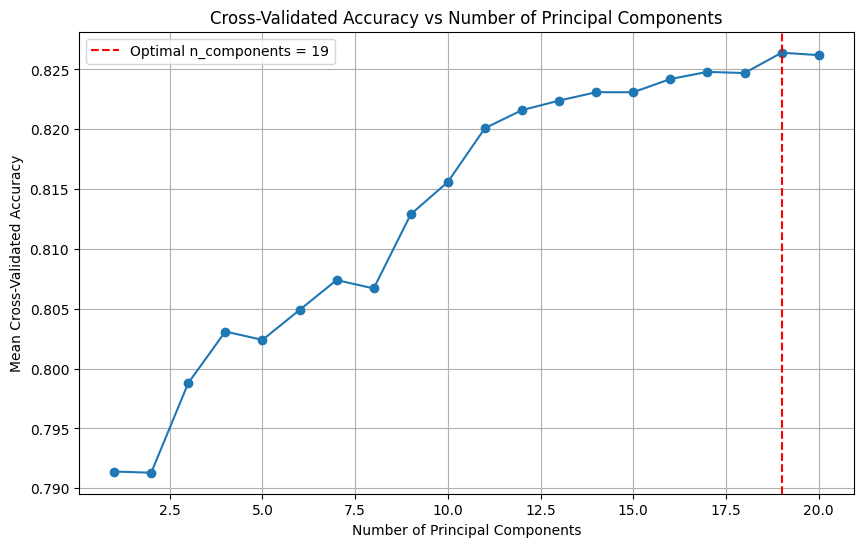

최적의 주성분 개수: 19


In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# 예제 데이터프레임 생성 (여기서는 df를 사용한다고 가정합니다)
# X는 feature, y는 target 변수입니다.

# X와 y를 정의합니다
X = df_standardized.drop(columns=['churn'])
y = df_standardized['churn']

# 주성분 개수를 다양하게 시도해볼 범위 설정
n_components_range = range(1, min(X.shape[1], 21))  # X의 열 개수보다 많지 않은 범위

# 교차 검증을 통해 각 주성분 개수의 성능 평가
cv_scores = []
for n_components in n_components_range:
    # PCA와 로지스틱 회귀 모델을 포함하는 파이프라인 생성
    pipe = make_pipeline(
        StandardScaler(),
        PCA(n_components=n_components),
        LogisticRegression(max_iter=1000)
    )
    
    # 교차 검증 점수 계산
    scores = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')  # 5-겹 교차 검증
    cv_scores.append(scores.mean())

# 결과를 DataFrame으로 정리
results = pd.DataFrame({
    'n_components': n_components_range,
    'mean_cv_score': cv_scores
})

# 결과 플롯
plt.figure(figsize=(10, 6))
plt.plot(results['n_components'], results['mean_cv_score'], marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy vs Number of Principal Components')
plt.grid(True)

# 최적의 주성분 개수 찾기
optimal_n_components = results.loc[results['mean_cv_score'].idxmax(), 'n_components']
plt.axvline(x=optimal_n_components, color='r', linestyle='--', label=f'Optimal n_components = {optimal_n_components}')
plt.legend()

plt.show()

print(f'최적의 주성분 개수: {optimal_n_components}')


In [67]:
df_standardized.dtypes

credit_score                         float64
balance_per_age                      float64
balance_per_tenure                   float64
salary_per_products                  float64
active_member                        float64
churn                                float64
country_France                       float64
country_Germany                      float64
country_Spain                        float64
age_group_gender_eighties_Female     float64
age_group_gender_eighties_Male       float64
age_group_gender_fifties_Female      float64
age_group_gender_fifties_Male        float64
age_group_gender_forties_Female      float64
age_group_gender_forties_Male        float64
age_group_gender_nineties_Male       float64
age_group_gender_seventies_Female    float64
age_group_gender_seventies_Male      float64
age_group_gender_sixties_Female      float64
age_group_gender_sixties_Male        float64
age_group_gender_teenager_Female     float64
age_group_gender_teenager_Male       float64
age_group_

In [68]:
pca = PCA()
X = df_standardized.drop(columns=['churn'])
X_pca = pca.fit_transform(X)

In [69]:
X.shape[1]

25

In [70]:
# n=23
# li=[]
# for i in range(1,n+1):
#     prin=f'principal {i}'
#     li.append(prin)
# print(li)

In [71]:
import pandas as pd
from sklearn.decomposition import PCA

n=7
li=[]
for i in range(1,n+1):
    prin=f'principal {i}'
    li.append(prin)

# 2. PCA 적용
pca = PCA(n_components=n)  # 주성분의 개수 설정
principal_components = pca.fit_transform(X)

# 결과를 데이터프레임으로 변환
pca_df = pd.DataFrame(data=principal_components, columns=li)

# print("PCA 결과:")
# print(pca_df)

# print("\n주성분의 설명된 분산 비율:")
# print(pca.explained_variance_ratio_)

# print("\n주성분 벡터:")
# print(pca.components_)

In [72]:
# 주성분 분석 결과
pca_df

,principal 1,principal 2,principal 3,principal 4,principal 5,principal 6,principal 7
0,-0.480726,1.450998,-0.260557,-0.112632,-0.147195,-0.405769,1.815771
1,-1.777023,-0.784070,1.257699,-0.734880,-0.256732,-0.702865,1.939161
2,0.182002,1.152425,-0.656212,0.007755,-0.098871,-1.544592,2.146551
3,0.763042,1.175316,-0.457505,-1.258284,1.638477,-0.780710,-0.083472
4,-1.112262,-1.103965,1.095583,-0.917110,0.262971,-0.169176,2.097659
...,...,...,...,...,...,...,...
9995,0.810383,1.058671,0.540094,1.620664,0.797346,-0.471310,0.006568
9996,-0.392517,1.616506,1.084742,1.698026,0.167722,0.100712,-0.575460
9997,0.643431,1.212276,-0.187051,-1.409601,1.703192,0.518798,-0.571448
9998,-1.883034,-0.709159,-1.775213,0.105118,-0.921731,-0.937926,-1.406821


In [73]:
# 주성분의 설명된 분산 비율
pca.explained_variance_ratio_

array([0.0739357 , 0.06584388, 0.05417775, 0.05050288, 0.04706661,
       0.0467354 , 0.04478153])

In [74]:
pca.explained_variance_ratio_.cumsum() # 누적합

# 주성분 분석을 통해 데이터의 차원을 축소할 때,
# 설명된 분산 비율을 보고 중요한 주성분만 선택해도 데이터의 대부분을 설명할 수 있습니다

# 0.77659791
# 주성분 7개로 얻을 수 있는 데이터에 대한 설명력

# 80% 정도는 일반적으로 충분한 설명력입니다
# 90%에 도달하려고 하면 주성분 개수가 지나치게 많아질 수 있습니다

array([0.0739357 , 0.13977958, 0.19395732, 0.24446021, 0.29152682,
       0.33826222, 0.38304376])

# 엘보우 방법으로 주성분 개수 찾아내기

In [75]:
# 엘보우 방법
# 데이터의 분산 비율을 기준
# 모델 성능과는 직접적인 연관이 없습니다
# 교차 검증은 주성분을 적용한 후의 모델 성능을 평가하는 것
# 엘보우 방법과 모델 성능은 다르게 측정됩니다

In [76]:
# plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
# plt.xlabel('Principal Component')
# plt.ylabel('Explained Variance Ratio')
# plt.title('Explained Variance by Principal Components (Elbow Method)')
# plt.grid(True)
# plt.show()

# 그래프에서 엘보우(Elbow) 지점을 찾는 방법도 유용합니다.
# 설명된 분산 비율이 급격히 줄어들기 시작하는 지점을 찾고, 그 이전의 주성분을 선택하는 방식입니다.
# 설명된 분산 비율 그래프가 급격하게 꺾이는 부분에서 주성분을 선택하는 것이 좋은 기준이 될 수 있습니다.
# 그 이후로는 추가되는 주성분이 설명할 수 있는 정보가 적기 때문입니다.

# 주성분 벡터-각 주성분의 원본 특성에 대한 기여도

In [77]:
# 주성분 벡터를 데이터프레임으로 변환
components_df = pd.DataFrame(
    pca.components_, 
    columns=X.columns,  # 종속 변수 제외한 열 이름
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

In [78]:
components_df

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,age_group_gender_eighties_Male,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
PC1,0.024508,0.626261,0.081537,-0.075543,-0.060045,0.294346,-0.241258,-0.098638,-0.005728,-0.045759,...,-0.075714,-0.101906,-0.127601,-0.172423,0.059209,0.137780,0.070271,0.138360,0.276426,0.326905
PC2,-0.027180,-0.262299,-0.027340,0.028373,0.042759,0.709337,-0.379209,-0.440766,0.053598,0.016759,...,0.043581,0.050841,0.100982,0.120872,-0.054590,-0.071720,0.013333,-0.032162,-0.112512,-0.150914
PC3,-0.030414,-0.080023,0.022955,-0.043221,0.179648,-0.023647,-0.582213,0.612104,-0.003265,0.039861,...,0.000879,0.073118,0.048918,0.172018,-0.061263,-0.036095,-0.108393,0.365212,-0.082597,-0.124570
PC4,-0.047405,-0.003276,-0.005039,0.058146,-0.065809,0.001131,0.276302,-0.278799,-0.011583,0.004256,...,-0.078473,-0.007297,0.041761,-0.075280,-0.002735,-0.002333,-0.483290,0.732784,-0.116482,-0.101805
PC5,0.176350,-0.030650,-0.072583,-0.095716,-0.056100,-0.027896,0.092301,-0.060386,-0.041874,0.022834,...,0.071773,-0.056244,-0.161154,0.001139,-0.016445,-0.022647,0.646857,0.216512,-0.147961,-0.357995
PC6,0.172144,0.015529,-0.053497,-0.124607,0.567579,-0.023974,0.151294,-0.124176,0.028691,0.073893,...,0.259772,0.221519,0.187786,0.236126,-0.020109,0.110720,-0.097369,-0.080066,0.190674,0.184769
PC7,0.030602,-0.009390,0.087823,-0.097214,-0.132054,0.023808,-0.107807,0.080694,0.164389,0.008441,...,-0.026820,0.026308,0.092588,0.036241,0.144706,-0.020504,-0.210787,-0.128686,-0.137149,0.311056


# 주성분 벡터 시각화

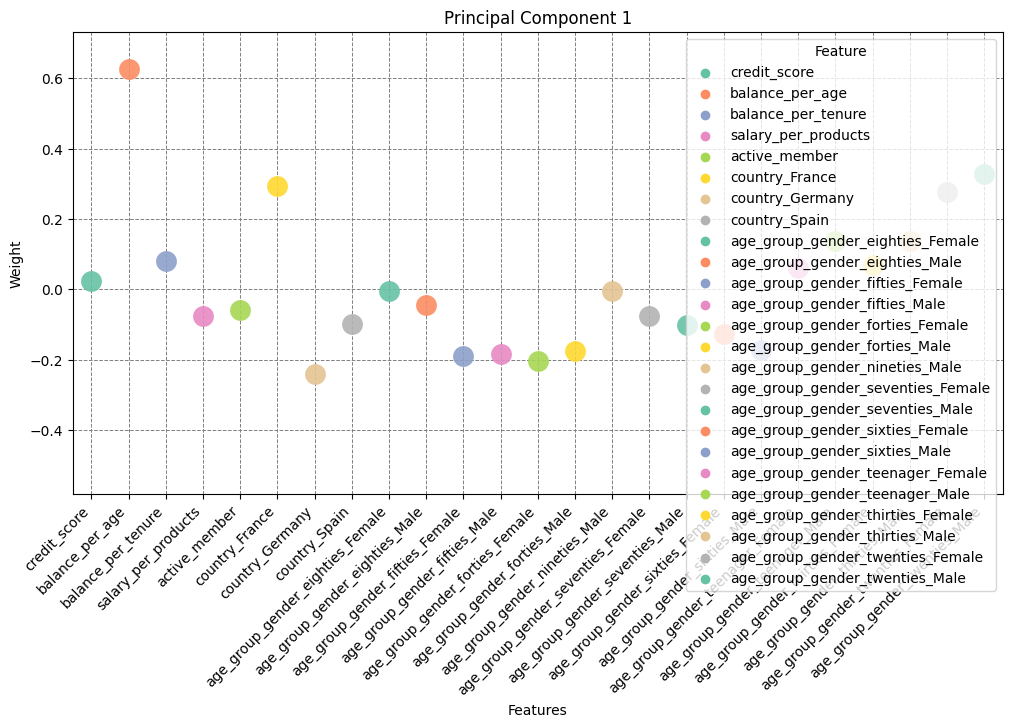

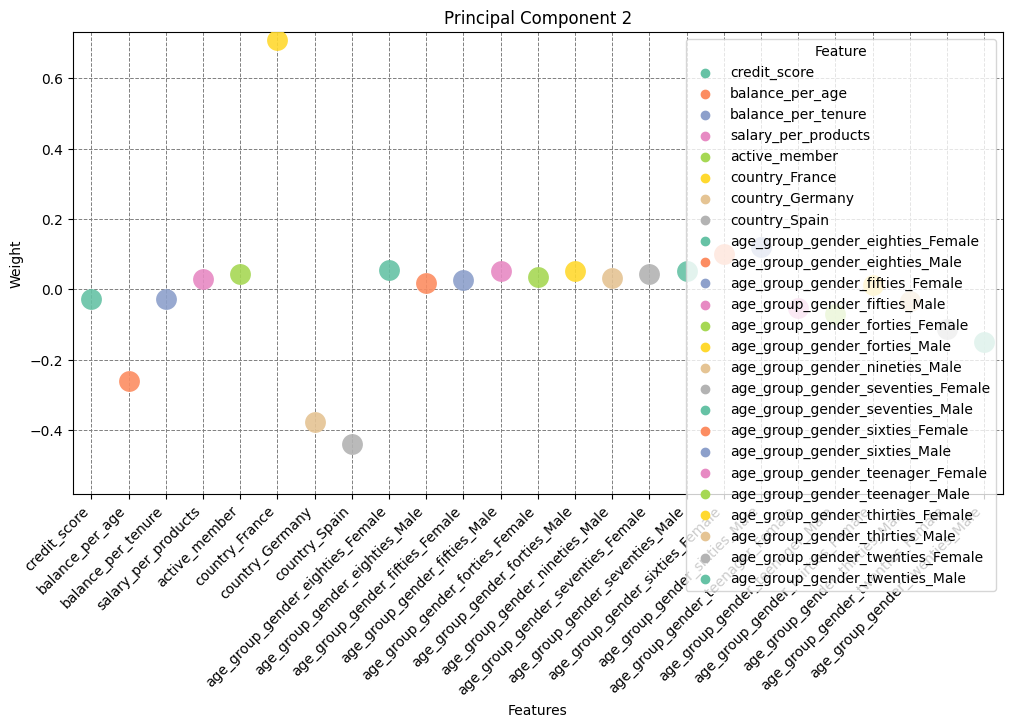

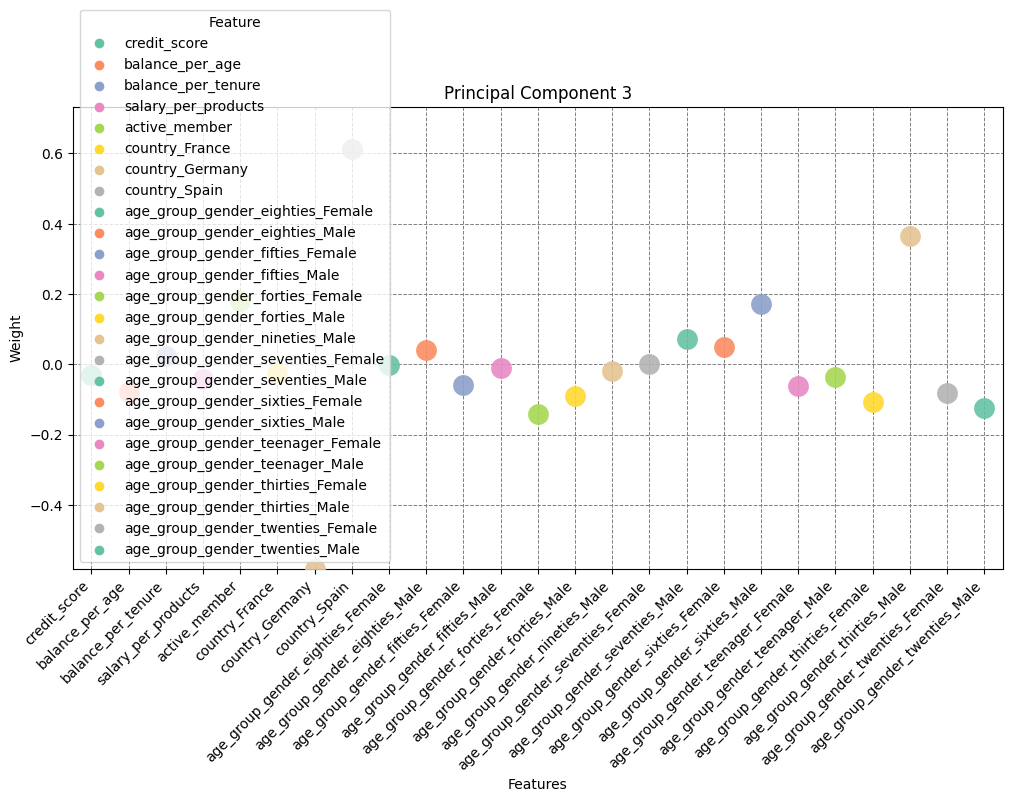

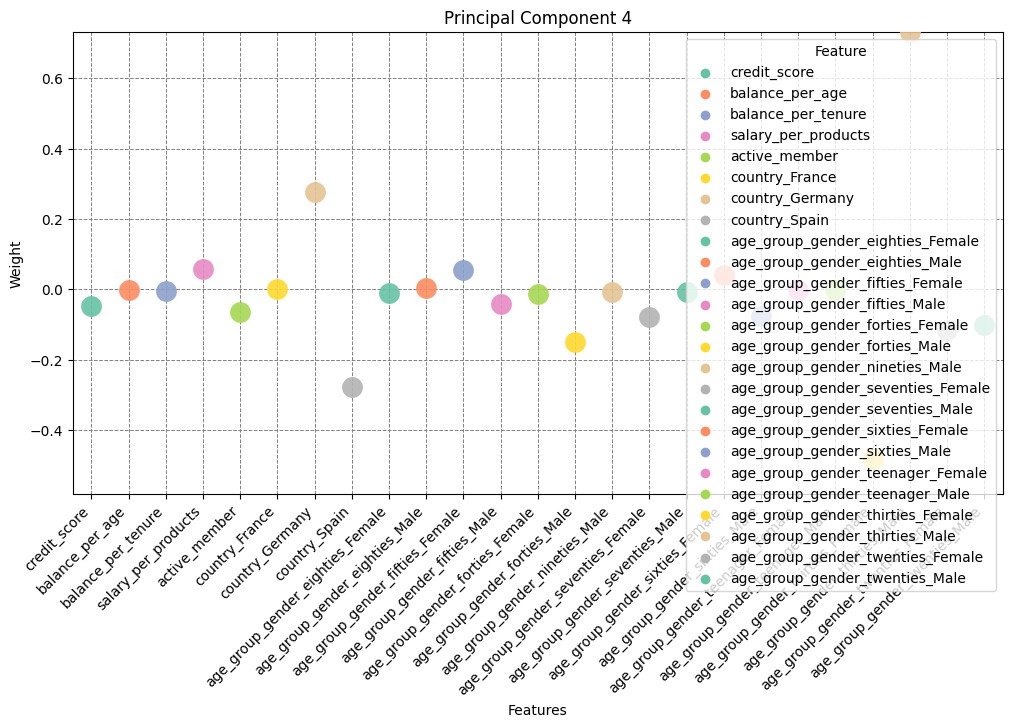

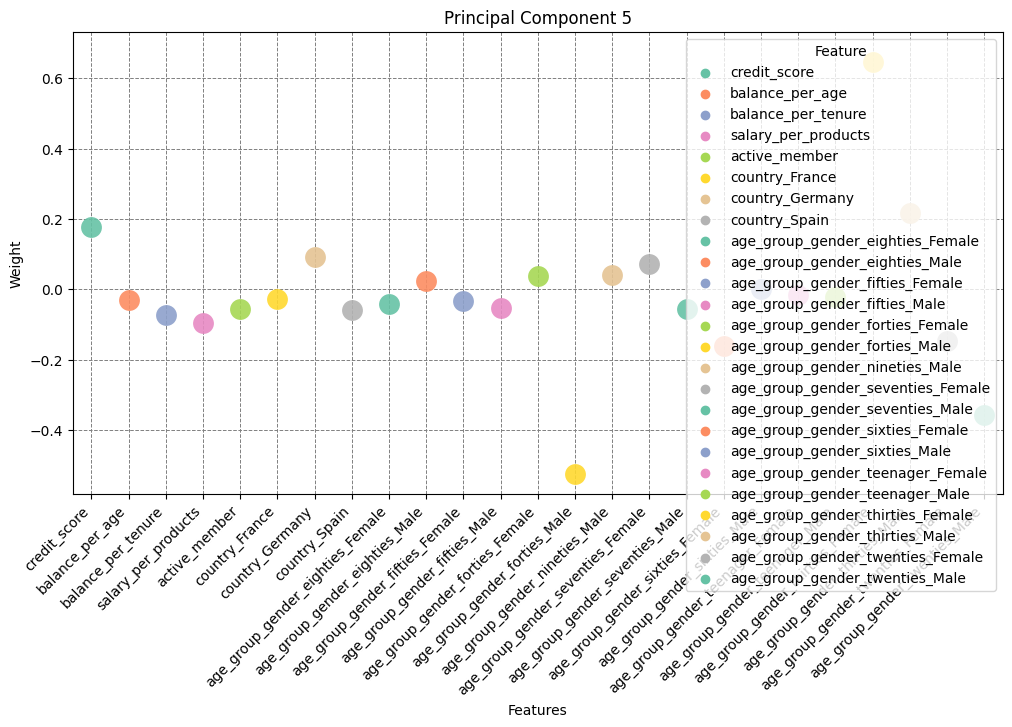

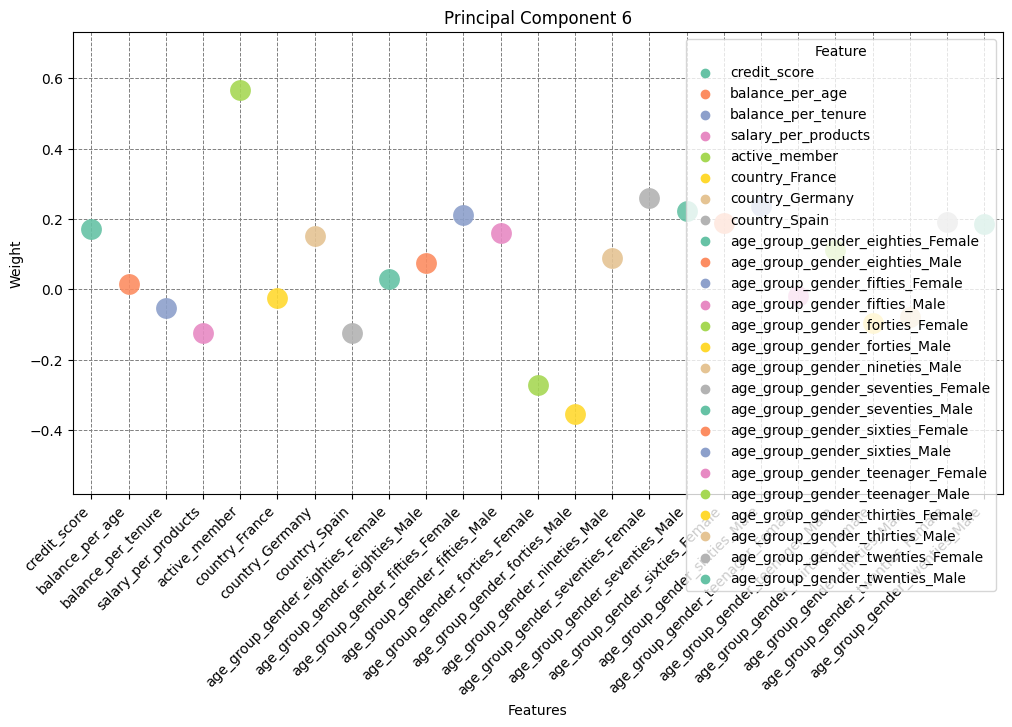

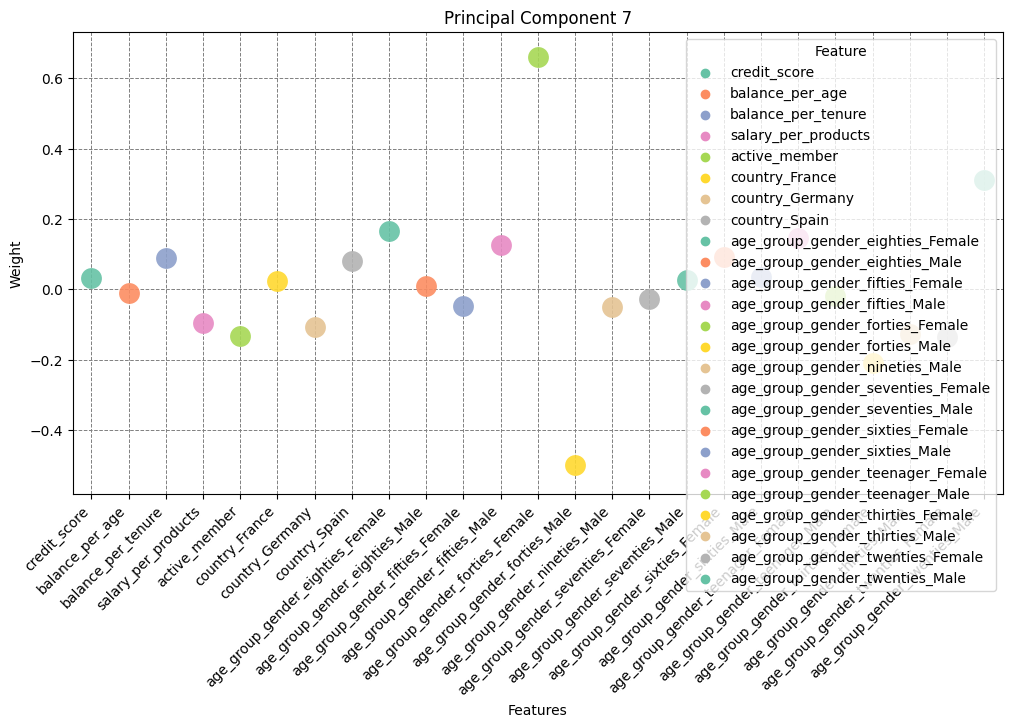

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

# 데이터프레임의 길이를 맞추기 위해 Melt
melted_df = components_df.reset_index().melt(id_vars='index', var_name='Feature', value_name='Weight')
melted_df.rename(columns={'index': 'Principal Component'}, inplace=True)

# Y축 범위를 동일하게 설정하기 위해 모든 주성분의 Weight의 범위를 찾기
min_weight = melted_df['Weight'].min()
max_weight = melted_df['Weight'].max()

# 각 주성분별로 바이올린 플롯을 개별적으로 생성
for i in range(7):
    plt.figure(figsize=(12, 6))
    # 점으로 데이터 표시
    sns.stripplot(x='Feature', y='Weight', hue='Feature', data=melted_df[melted_df['Principal Component'] == f'PC{i+1}'],   
              dodge=False, # 점들이 중심에 맞추어 배치되도록 합니다. 기본값은 True로, 이 경우 각 범주에 대해 점이 약간 이동합니다.
              palette='Set2', size=15, alpha=0.9, jitter=True)
    plt.title(f'Principal Component {i+1}')
    plt.grid(True, which='both', linestyle='--', linewidth=0.7, color='gray')  # 그리드 추가
    plt.xlabel('Features')
    plt.xticks(rotation=45, ha='right')  # x축 레이블을 45도 기울이기
    plt.ylim(min_weight, max_weight)  # y축 범위 설정
    # plt.legend_.remove()  # 범례 제거
    plt.show()

# 벡터는 크기나 방향이 절대적이지 않고 데이터에 따라 상대적이다

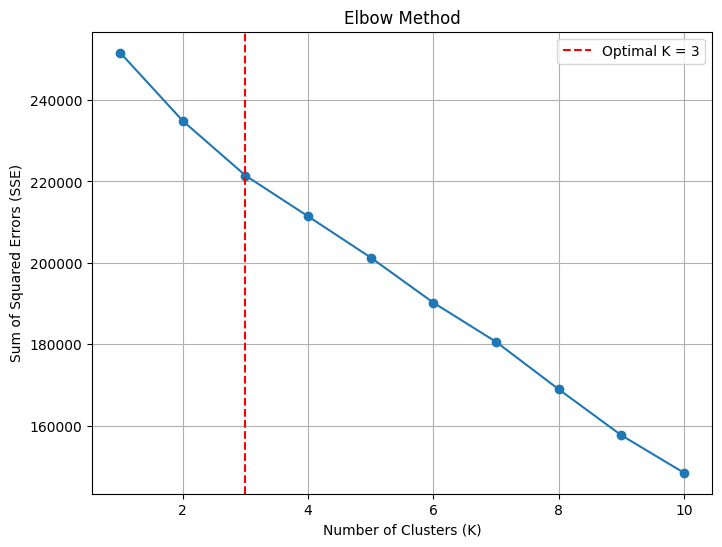

Optimal number of clusters: 3


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# K 값의 범위를 설정
K_range = range(1, 11)
SSE = []

# 각 K 값에 대해 K-평균 클러스터링 수행
for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(df_standardized)
    SSE.append(kmeans.inertia_)

# SSE의 1차 및 2차 변화량 계산
SSE = np.array(SSE)
delta_SSE = np.diff(SSE)
delta2_SSE = np.diff(delta_SSE)

# 가장 큰 2차 변화량 찾기
optimal_K = np.argmax(delta2_SSE) + 2  # +2는 K값이 1부터 시작하므로

# 엘보우 방법 플롯
plt.figure(figsize=(8, 6))
plt.plot(K_range, SSE, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method')
plt.grid(True)

# 가장 꺾임이 심한 부분에 선 추가
plt.axvline(x=optimal_K, color='r', linestyle='--', label=f'Optimal K = {optimal_K}')
plt.legend()
plt.show()

print(f'Optimal number of clusters: {optimal_K}')


In [81]:
X

,credit_score,balance_per_age,balance_per_tenure,salary_per_products,active_member,country_France,country_Germany,country_Spain,age_group_gender_eighties_Female,age_group_gender_eighties_Male,...,age_group_gender_seventies_Female,age_group_gender_seventies_Male,age_group_gender_sixties_Female,age_group_gender_sixties_Male,age_group_gender_teenager_Female,age_group_gender_teenager_Male,age_group_gender_thirties_Female,age_group_gender_thirties_Male,age_group_gender_twenties_Female,age_group_gender_twenties_Male
0,-0.326221,-0.402237,0.439067,0.511633,0.970243,0.997204,-0.578736,-0.573809,-0.024502,-0.026467,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767
1,-0.440036,-1.141788,0.517514,0.726664,0.970243,-1.002804,-0.578736,1.742740,-0.024502,-0.026467,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767
2,-1.536794,0.464244,-0.450913,-0.705735,-1.030670,0.997204,-0.578736,-0.573809,-0.024502,-0.026467,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767
3,0.501521,-0.201650,1.239547,-0.534073,-1.030670,0.997204,-0.578736,-0.573809,-0.024502,-0.026467,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,2.075537,-0.571500,-0.282071,-0.305767
4,2.063884,-0.342349,0.514829,0.083927,0.970243,-1.002804,-0.578736,1.742740,-0.024502,-0.026467,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,-0.201650,-0.361412,-0.510598,-1.030670,0.997204,-0.578736,-0.573809,-0.024502,-0.026467,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,1.749782,-0.282071,-0.305767
9996,-1.391939,-1.511880,-0.952871,0.518374,0.970243,0.997204,-0.578736,-0.573809,-0.024502,-0.026467,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,1.749782,-0.282071,-0.305767
9997,0.604988,0.032368,-0.561532,-0.626813,0.970243,0.997204,-0.578736,-0.573809,-0.024502,-0.026467,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,2.075537,-0.571500,-0.282071,-0.305767
9998,1.256835,-1.376280,-0.409684,-0.543083,-1.030670,-1.002804,1.727904,-0.573809,-0.024502,-0.026467,...,-0.08396,-0.08151,-0.129525,-0.14646,-0.036079,-0.060108,-0.481803,-0.571500,-0.282071,-0.305767


In [82]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-평균 클러스터링 수행
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(df_standardized)

# 클러스터링 결과를 데이터프레임에 추가
X['Cluster'] = clusters

# K-평균 클러스터링 결과 시각화
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df_standardized[:, 0], df_standardized[:, 1], c=clusters, cmap='viridis', marker='o')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='x', label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.colorbar(scatter, label='Cluster')
plt.legend()
plt.grid(True)
plt.show()


TypeError: '(slice(None, None, None), 0)' is an invalid key

<Figure size 800x600 with 0 Axes>